In [4]:
import sys
print("Echo system status -- reset environment if kernel NOT 3.8...")
print(sys.executable)
print(sys.version)
print(sys.version_info)
# testing on aws lightsail instance 21 July 2020

Echo system status -- reset environment if kernel NOT 3.8...
/opt/conda/envs/python/bin/python
3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)



# Warning!!

**This notebook takes a long time to run (3+ minutes on 1GB/1CPU/2GHz)**

# Artifical Neural Network

From Wikipedia:

An artificial neural network is an interconnected group of nodes, inspired by a simplification of neurons in a brain. Here, each circular node represents an artificial neuron and an arrow represents a connection from the output of one artificial neuron to the input of another.
Artificial neural networks (ANN) or connectionist systems are computing systems vaguely inspired by the biological neural networks that constitute animal brains. 
Such systems "learn" to perform tasks by considering examples, generally without being programmed with task-specific rules. For example, in image recognition, they might learn to identify images that contain cats by analyzing example images that have been manually labeled as "cat" or "no cat" and using the results to identify cats in other images. 
They do this without any prior knowledge of cats, for example, that they have fur, tails, whiskers and cat-like faces. 
Instead, they automatically generate identifying characteristics from the examples that they process.

An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron that receives a signal then processes it and can signal neurons connected to it.

In ANN implementations, the "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times.

The original goal of the ANN approach was to solve problems in the same way that a human brain would. But over time, attention moved to performing specific tasks, leading to deviations from biology. ANNs have been used on a variety of tasks, including computer vision, speech recognition, machine translation, social network filtering, playing board and video games, medical diagnosis, and even in activities that have traditionally been considered as reserved to humans, like painting.

First some set-up, for the next part of the background:

In [5]:
import numpy              # useful numerical routines
import scipy.special      # special functions library
import scipy.misc         # image processing code
import imageio
import matplotlib.pyplot  # import plotting routines

## Classification

Computers are nothing more than calculators at heart. They are very very fast at doing  arithmetic.  This is great for doing tasks that match what a calculator does: summing numbers to work out sales, applying percentages to work out tax, plotting graphs of existing data.  
Even watching catchup TV or streaming music through your computer doesn’t involve much  more than the computer executing simple arithmetic instructions again and again. 
It may  surprise you but reconstructing a video frame from the ones and zeros that are piped across the  internet to your computer is done using arithmetic not much more complex than the sums we  did at school.  
Adding up numbers really quickly  thousands, or even millions of times a second  may be impressive  but it isn’t intelligence. 

A human may find it hard to do large sums very quickly but the  process of doing it doesn’t require much intelligence at all. It simply requires an ability to follow  very basic instructions, and this is what the electronics inside a computer does.  Now let’s flips things and turn the tables on computers!  Look at the following images and see if you can recognise what they contain: 

![](image_src/pictures.png)

You can immediately recognize people, a cat, and a tree -- you are ably to classify the pictures very fast.
We can process the quite large amount of information that the images contain, and very  successfully process it to recognise what’s in the image. This kind of task isn’t easy for  computers  in fact it’s incredibly difficult. 

Consider what happens when we reduce the information into a 27X27 pixel map to see one reason why classification is hard for a machine -- a resolution issue, also we will see how at reduce resolution the pictures look alike.

First render the people image in reduced resolution about 1/2 of the original -- still barely recognizable for us humans

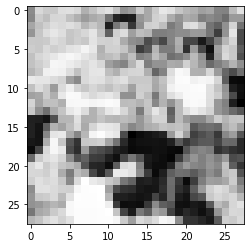

In [6]:
img_array = imageio.imread("image_src/people784.png", as_gray = True)
img_data0 = 255.0 - img_array.reshape(784)
img_data0 = ((img_data0/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data0).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

In [7]:
print("people784 statistics : ",img_data0.mean(),img_data0.var())

people784 statistics :  0.48325375 0.06275265


Now render the cat image in reduced resolution about 1/2 of the original -- still  recognizable for us humans

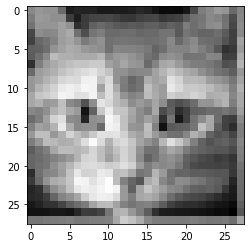

In [8]:
img_array = imageio.imread("image_src/cat784.png", as_gray = True)
img_data1 = 255.0 - img_array.reshape(784)
img_data1 = ((img_data1/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data1).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

In [9]:
print("cat784 statistics : ",img_data1.mean(),img_data1.var())

cat784 statistics :  0.60355407 0.023282547


Now render the tree image in reduced resolution about 1/3 of the original -- still  recognizable for us humans

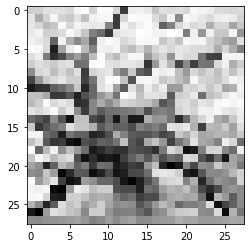

In [10]:
img_array = imageio.imread("image_src/tree784.png", as_gray = True)
img_data2 = 255.0 - img_array.reshape(784)
img_data2 = ((img_data2/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data2).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

In [11]:
print("tree784 statistics : ",img_data2.mean(),img_data2.var())

tree784 statistics :  0.484061 0.049499817


Using the image statistics, which is just the gray-scale value of each pixel (0-254), we see that the images are different with this simple metric but not by much

    Image       Mean           Variance
    People    0.48325375     0.06275265
    Cat       0.60355407     0.023282547
    Tree      0.484061       0.049499817
    
If we used just a statistical description, in the mean people and tree are the same, whereas a cat is different. But not all cats will have the same mean (or variance).  So simplistic numerical descriptors are useless, we need more that a couple of metrics for the image perhaps higher moments, or a way to consider all pixels at once -- sort of like a regression model. 

We humans naturally fill in missing information and can classify very fast  -- cognative scientists think (now thats a pun!) that our mind performs "regressions" on the whole image and reduces it to a set of classifiers then these are compared in our brain to historical results and the classification that throw off the most dopamine (our brain's drug of choice) is selected.  It happens fast because the chemical reactions involved can be processed in parallel, the message is sent evreywhere at once and the molecules themselves don't even have to arrive for the classification to occur.

## Things to do
link videos
- explain prediction vs clasification
- explain neuron functions
- ANN 

write ups/future fixes

- modify so my photos can be added to a training file
- modify so can ask for filenames
- modify so can render images and send output to PDF/PNG files
- modify to do something engineering useful -- like partition watersheds into developed, undeveloped and a few other classes based on GoogleEarth image captures

In [12]:
(28054)**(1/2) #not sure why I put this here, looks like figuring pixel counts

167.49328344742662

### Define the ANN class 
Need write up on OOP and why using classes.

In [13]:
class neuralNetwork:  # Class Definitions 

    # initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in input, hidden, and output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # learning rate
        self.lr = learningrate
        
        # initalize weight matrices
        #
        # link weight matrices, wih (input to hidden) and
        #                       who (hidden to output)
        # weights inside the arrays are w_i_j where link is from node i
        # to node j in next layer
        #
        # w11 w21
        # w12 w22 etc.
        
        self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)

        # activation function
        self.activation_function = lambda x:scipy.special.expit(x)
        pass

    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert input list into 2D array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # convert target list into 2D array
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)

        # calculate signals from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)

        # calculate signals from output layer
        final_outputs = self.activation_function(final_inputs)

        # calculate output errors (target - model)
        output_errors = targets - final_outputs

        # calculate hidden layer errors (split by weigths recombined in hidden layer)
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # update the weights for the links from hidden to output layer
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))

        # update the weights for the links from input to hidden layer
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))                                       
        
        pass

    # query the neural network
    def query(self, inputs_list):
        # convert input list into 2D array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)

        # calculate signals from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)

        # calculate signals from output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

        pass
print("neuralNetwork Class Loads OK")

neuralNetwork Class Loads OK


### Explain why a test case

In [14]:
# Test case 1 p130 MYONN
# number of input, hidden, and output nodes
input_nodes  = 784    # 28X28 Pixel Image 
hidden_nodes = 110    # Should be smaller than input count (or kind of useless)
output_nodes =  10    # Classifications
learning_rate = 0.1   # set learning rate
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate) # create an instance
print("Instance n Created")

Instance n Created


## Explain Training

### Explain Concept of Learning Rate and Training Episodes (kind of a bootstrap here!)

In [58]:
# load a training file
# replace code here with a URL get
## training_data_file = open("mnist_train_100.csv",'r') #connect the file#
training_data_file = open("mnist_train.csv",'r') #connect the file#
training_data_list = training_data_file.readlines() #read entire contents of file into object: data_list#
training_data_file.close() #disconnect the file#
# print(len(training_data_list))   ## activate for debugging otherwise leave disabled
# train the neural network
howManyTrainingTimes = 0
for times in range(0,2):  # added outer loop for repeat training same data set
    howManyTrainingRecords = 0
    for record in training_data_list:
    # split the values on the commas
        all_values = record.split(',') # split datalist on commas - all records.  Is thing going to work? #
        inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
#        inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    # print(inputs)          ## activate for debugging otherwise leave disabled
    # create target output values -- all 0.01 except for the label of 0.99
        targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] is the target for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        howManyTrainingRecords += 1
        pass
    howManyTrainingTimes += 1
    learning_rate *= 0.9
    pass
print ("training records processed   = ",howManyTrainingRecords)
print ("training episodes            = ",howManyTrainingTimes)
# load a production file
## test_data_file = open("mnist_test_10.csv",'r') #connect the file#
test_data_file = open("mnist_test.csv",'r') #connect the file#
test_data_list = test_data_file.readlines() #read entire contents of file into object: data_list#
test_data_file.close() #disconnect the file#

training records processed   =  60000
training episodes            =  2


**Runtime above cell ~ 3 minutes on AWS 1GB/1CPU/2GHz virtual machine**

## Explain Testing

In [59]:
# test the neural network
scorecard = [] # empty array for keeping score

# run through the records in test_data_list
howManyTestRecords = 0
for record in test_data_list:
    # split the values on the commas
    all_values = record.split(',') # split datalist on commas - all records #
    correct_label = int(all_values[0]) # correct answer is first element of all_values
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    # query the neural network
    outputs = n.query(inputs)
    predict_label = numpy.argmax(outputs)
    ##    print "predict =",predict_label,correct_label,"= correct" # activate for small test sets only!
    if (predict_label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    howManyTestRecords += 1
    pass
print ("production records processed =", howManyTestRecords)
## print scorecard   # activate for small test sets only!
# calculate performance score, fraction of correct answers
scorecard_array = numpy.asfarray(scorecard)
print ("performance = ",scorecard_array.sum()/scorecard_array.size)

production records processed = 10000
performance =  0.9646


## Explain using own images

How were images obtained?

How are they pre-processed to get 28x28 size? (GraphicConverter and linear aggregation) -- This can probably be done in python subsystem (function) this worksheet.

Why are the colors and alpha-channel squashed into greyscale?

Play with the training episodes - see if can get 90% recognition (9/10) correct.  Examine failed recognition, try to explain why.

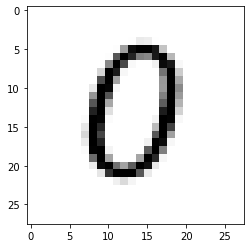

my number = 0  my network thinks its =  0


In [60]:
# lets try one of my own pictures
# first read and render
#img_array = scipy.misc.imread("MyZero.png", flatten = True) Fuckers deprecated this utility!
img_array = imageio.imread("image_src/MyZero.png", as_gray = True)
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

print ("my number = 0 ","my network thinks its = ",mylabel)

In [61]:
m0=img_data.mean()
v0=img_data.var()

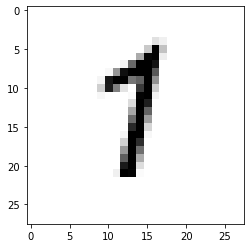

my number = 1  my network thinks its =  1


In [62]:
#first read and render
img_array = imageio.imread("image_src/MyOne.png", as_gray = True)
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

print ("my number = 1 ","my network thinks its = ",mylabel)

In [63]:
m1=img_data.mean()
v1=img_data.var()

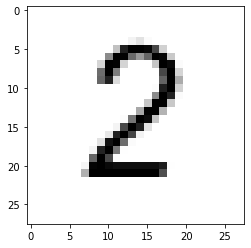

my number = 2  my network thinks its =  2


In [64]:
#first read and render
img_array = imageio.imread("image_src/MyTwo.png", as_gray = True)
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

print ("my number = 2 ","my network thinks its = ",mylabel)

In [65]:
m2=img_data.mean()
v2=img_data.var()

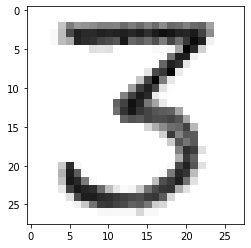

my number = 3  my network thinks its =  3


In [66]:
#first read and render
img_array = imageio.imread("image_src/MyThree.png", as_gray = True)
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')
mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

print ("my number = 3 ","my network thinks its = ",mylabel)

In [67]:
m3=img_data.mean()
v3=img_data.var()

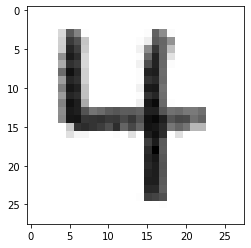

my number = 4  my network thinks its =  4


In [68]:
#first read and render
img_array = imageio.imread("image_src/MyFour.png", as_gray = True)
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

print ("my number = 4 ","my network thinks its = ",mylabel)

In [69]:
m4=img_data.mean()
v4=img_data.var()

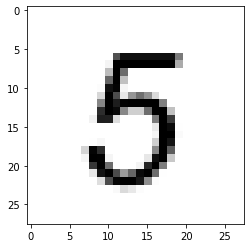

my number = 5  my network thinks its =  5


In [70]:
#first read and render
img_array = imageio.imread("image_src/MyFive.png", as_gray = True)
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

print ("my number = 5 ","my network thinks its = ",mylabel)

In [71]:
m5=img_data.mean()
v5=img_data.var()

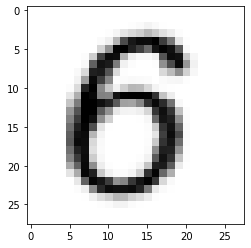

my number = 6  my network thinks its =  0


In [72]:
#first read and render
img_array = imageio.imread("image_src/MySix.png", as_gray = True)
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

print ("my number = 6 ","my network thinks its = ",mylabel)


In [73]:
m6=img_data.mean()
v6=img_data.var()

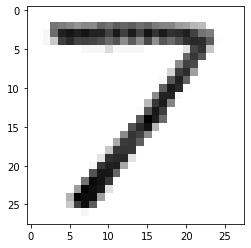

my number = 7  my network thinks its =  7


In [74]:
#first read and render
img_array = imageio.imread("image_src/MySeven.png", as_gray = True)
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

print ("my number = 7 ","my network thinks its = ",mylabel)

In [75]:
m7=img_data.mean()
v7=img_data.var()

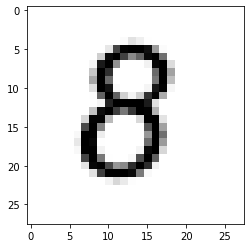

my number = 8  my network thinks its =  8


In [76]:
#first read and render
img_array = imageio.imread("image_src/MyEight.png", as_gray = True)
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

print ("my number = 8 ","my network thinks its = ",mylabel)

In [77]:
m8=img_data.mean()
v8=img_data.var()

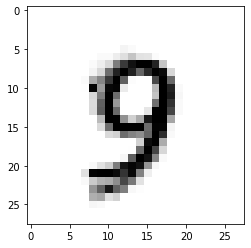

my number = 9  my network thinks its =  9


In [78]:
#first read and render
img_array = imageio.imread("image_src/MyNine.png", as_gray = True)
img_data = 255.0 - img_array.reshape(784)
img_data = ((img_data/255.0)*0.99) + 0.01
matplotlib.pyplot.imshow(numpy.asfarray(img_data).reshape((28,28)),cmap = 'Greys') # construct a graphic object #
matplotlib.pyplot.show() # show the graphic object to a window #
matplotlib.pyplot.close('all')

mynumber = n.query(img_data)
mylabel = numpy.argmax(mynumber)

print ("my number = 9 ","my network thinks its = ",mylabel)
pass    


In [79]:
m9=img_data.mean()
v9=img_data.var()


print("my 0 statistics : ",m0,v0)
print("my 1 statistics : ",m1,v1)
print("my 2 statistics : ",m2,v2)
print("my 3 statistics : ",m3,v3)
print("my 4 statistics : ",m4,v4)
print("my 5 statistics : ",m5,v5)
print("my 6 statistics : ",m6,v6)
print("my 7 statistics : ",m7,v7)
print("my 8 statistics : ",m8,v8)
print("my 9 statistics : ",m9,v9)

my 0 statistics :  0.10840577 0.07128458
my 1 statistics :  0.0691415 0.045747854
my 2 statistics :  0.10085894 0.06906258
my 3 statistics :  0.15961523 0.071290515
my 4 statistics :  0.1313567 0.06362193
my 5 statistics :  0.11012904 0.07498277
my 6 statistics :  0.18414135 0.09940878
my 7 statistics :  0.11907936 0.056603365
my 8 statistics :  0.12214256 0.08051322
my 9 statistics :  0.123187415 0.07515885




## References
http://myselph.de/neuralNet.html

LazyProgrammer. Unsupervised Machine Learning in Python: Master Data Science and Machine Learning with Cluster Analysis, Gaussian Mixture Models, and Principal Components Analysis . Kindle Edition. 

Rashid, Tariq. Make Your Own Neural Network. Kindle Edition. 

https://www.digitalocean.com/community/tutorials/an-introduction-to-machine-learning

In [80]:
######## Useful Stuff Below ######################

##an_input_list = ([1.0,0.5,-1.5])
##print("Trying a Query - input list first")
##print(an_input_list)
##print("Now the response")
##print(n.query(an_input_list))
##print("Instance works up to pg 138")

### get a single test record
##all_values = test_data_list[0].split(',')
##print('classification for this test record = ', all_values[0])
####image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
####matplotlib.pyplot.imshow(image_array) # construct a graphic object #
####matplotlib.pyplot.show() # show the graphic object to a window #
##print( n.query((numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01) )

##image_array = numpy.asfarray(scaled_input).reshape((28,28))
##matplotlib.pyplot.imshow(image_array) # construct a graphic object #
##matplotlib.pyplot.show() # show the graphic object to a window #
##matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation = 'nearest' ) # construct a graphic object #
##matplotlib.pyplot.show() # show the graphic object to a window #
# 
